<a href="https://colab.research.google.com/github/tangomaxe/ML_Project_Tasks/blob/main/ML_project_Task8_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Task 8
import pandas as pd
import numpy as np

own_data = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/magnetization_train.csv')
own_data.dropna(axis = 0, inplace = True)
print(own_data.shape)

(42078, 274)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

features = list(own_data)[2:-1]
properties = list(own_data)[-1]

X = own_data[features]
y = own_data[properties]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 0)

#Removing all features with low Variances (< 0.05)
selector = VarianceThreshold(threshold = 0.05)
X = selector.fit_transform(X)
feature_index_own = selector.get_support()
feature_names_own = selector.get_feature_names_out()
print(sum(feature_index_own))

236


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr

corr_spear = spearmanr(X).correlation

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [ ]:
from scipy.cluster import hierarchy

correlation_linkage = hierarchy.ward(corr_spear)
cluster_ids_own = hierarchy.fcluster(correlation_linkage, t = 2, criterion = 'distance')

print(cluster_ids_own)

from collections import defaultdict
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids_own):
    cluster_id_to_feature_ids[cluster_id].append(idx)
print(cluster_id_to_feature_ids)
selected_features_own = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features_own)
print('number of features after correlation reduction:',len(selected_features_own))


[ 7 72  5 35 15 43 14 42 43 66 69 52 67 69 15 43 14 42 43 83 82 84 82 82
 66 70 52 67 70 45 44 46 45 44 64 68 65 64 68 78 78 78 70 47 33 48 48 79
 71 79 76 71 24 60 23 59 60 12 13  2 13 13 61 63 61 62 63 47 48 48 56 57
 56 58 57 17 18 30 18 18 10 10 10 10 10 20 21 32 21 21 51 50 54 51 50 81
 81 81 81 81 16 16 16 80 71 80 80 71 73  1 42 15 11  9  6 85 67 66 76 26
 77  1 42 15 11  9  6  4 82 83 19  4  4 85 67 66 76 26 77  1 45 45 11  9
  6  6 64 64 53  5  5 75 78 78 75 26 75 29 48 47 29 88 77 76 79 76 28 77
 22 59 24 24 39 22 12 13 12 13 34  2 25 62 61 61 27 25 48 48 33 86 58 56
 58 28 87 30 17 17 17 40 41 10 10 10 10 34 36 31 21 20 20 37 31 55 51 51
 53  8  8 81 81 81 81 81 16 16 38  3 80 80 49  3  3 22 74 78]
defaultdict(<class 'list'>, {7: [0], 72: [1], 5: [2, 149, 150], 35: [3], 15: [4, 14, 111, 123], 43: [5, 8, 15, 18], 14: [6, 16], 42: [7, 17, 110, 122], 66: [9, 24, 117, 135], 69: [10, 13], 52: [11, 26], 67: [12, 27, 116, 134], 83: [19, 129], 82: [20, 22, 23, 128], 84: [21], 70: [2

['mean_EffectiveCoordination', 'var_EffectiveCoordination', 'min_EffectiveCoordination', 'max_EffectiveCoordination', 'mean_NeighDiff_shell1_Number', 'var_NeighDiff_shell1_Number', 'min_NeighDiff_shell1_Number', 'max_NeighDiff_shell1_Number', 'mean_NeighDiff_shell1_MendeleevNumber', 'var_NeighDiff_shell1_MendeleevNumber', 'min_NeighDiff_shell1_MendeleevNumber', 'max_NeighDiff_shell1_MendeleevNumber', 'mean_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_MeltingT', 'min_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_Column', 'mean_NeighDiff_shell1_Row', 'var_NeighDiff_shell1_Row', 'min_NeighDiff_shell1_Row', 'mean_NeighDiff_shell1_CovalentRadius', 'var_NeighDiff_shell1_CovalentRadius', 'min_NeighDiff_shell1_CovalentRadius', 'mean_NeighDiff_shell1_Electronegativity', 'mean_NeighDiff_shell1_NsValence', 'min_NeighDiff_shell1_NsValence', 'max_NeighDiff_shell1_NsValence', 'mean_NeighDiff_shell1_NpValence', 'var_NeighDiff_shell1_NpValence', 'max_NeighDiff_shell1_NpValence', 'mean_NeighDi

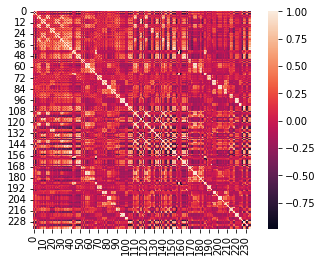

In [ ]:
import seaborn as sb

final_selected_features = []
for i in range(len(selected_features_own)):
  final_selected_features.append(feature_names_own[selected_features_own[i]])

print(final_selected_features)
print(len(final_selected_features))

sb.heatmap(corr_spear, square = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

'''com_data = own_data.sample(frac = 1, random_state = 0).reset_index(drop = True)
properties_removed = com_data[features]
sel_com_data = properties_removed[final_selected_features]
y_data = com_data[properties]'''

X_red = X[:, selected_features_own]
X = scaler.fit_transform(X_red, y)

'''sections = 10
sel_com_data_split = np.array_split(transformed_data, axis = 0, indices_or_sections = sections)
y_data_split = np.array_split(y_data, axis = 0, indices_or_sections = sections)

scaler = StandardScaler()'''


'''
scaled_X_test_train =[]
for i in (range(len(sel_com_data_split))):
  X_train, X_test, y_train, y_test = train_test_split(sel_com_data_split[i], y_data_split[i], test_size = 0.25, random_state = 0)
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  scaled_X_test_train.append([X_train, X_test, y_train, y_test])
'''

'\nscaled_X_test_train =[]\nfor i in (range(len(sel_com_data_split))):\n  X_train, X_test, y_train, y_test = train_test_split(sel_com_data_split[i], y_data_split[i], test_size = 0.25, random_state = 0)\n  scaler.fit(X_train)\n  X_train = scaler.transform(X_train)\n  X_test = scaler.transform(X_test)\n  scaled_X_test_train.append([X_train, X_test, y_train, y_test])\n'

In [ ]:
from sklearn.neural_network import MLPRegressor
from typing_extensions import ParamSpec
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

'''f_regression or mutual_info_regression ?'''
skb = SelectKBest(score_func = f_regression)
est_MLP = MLPRegressor(random_state = 0)
pipe_MLP = Pipeline([('SKB', skb), ('MLP', est_MLP)])

params_MLP = {
    'SKB__k': [10, 20, 30],
    'MLP__hidden_layer_sizes': [],
    'MLP__activation': ['logistic'],
    'MLP__solver': ['adam', 'sgd'],
    'MLP__learning_rate': ['constant', 'adaptive'],
}

params_MLP_rand = {
    'MLP__hidden_layer_sizes': [(20, 10), (40, 10)],
    'MLP__max_iter': [3000],
    'MLP__random_state': [0],
    'MLP__activation': ['relu', 'tanh', 'logistic'],
    'MLP__solver': ['adam'],
    'MLP__learning_rate': ['adaptive', 'constant'],
    'MLP__warm_start': [True]
}

In [ ]:
from sklearn.neural_network import MLPRegressor
'''{'MLP__warm_start': True, 'MLP__solver': 'adam', 'MLP__random_state': 0, 'MLP__max_iter': 4000, 'MLP__learning_rate': 'adaptive', 'MLP__hidden_layer_sizes': (9, 9), 'MLP__activation': 'relu'}'''

mlp = MLPRegressor(warm_start = True, solver ='adam', random_state = 0, hidden_layer_sizes = (20,10), max_iter = 2000, activation = 'relu', learning_rate = 'adaptive')

best_scores = -10
best_states = -1
for i in range(1000):
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
   scaler.fit(X_train)
   X_train = scaler.transform(X_train)
   X_test = scaler.transform(X_test)
   mlp.fit(X_train, y_train)
   score = mlp.score(X_test, y_test)
   if score > best_scores:
     best_scores = score
     best_states = i

print(best_scores)
print(best_states)


0.776708854994916
800


In [ ]:
import os
import joblib
import sklearn.pipeline

filename_WholeDataset = "trained_MLP_MH.joblib"
name = os.path.join('/content', filename_WholeDataset)

dumped_model = joblib.dump(mlp, open(filename_WholeDataset, 'wb'))

text = 'important_features_MLP.txt'
name = os.path.join('/content', text)

datei = open('/content/important_features_MLP.txt', 'w')
for i in range(len(final_selected_features)):
  datei.write(final_selected_features[i])
  datei.write('\n')

datei.close()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = pipe_MLP, param_distributions = params_MLP_rand, n_iter = 10,  cv = 10, verbose = 3, return_train_score = True)
random_search.fit(sel_com_data, y)

print('MLP:', random_search.best_score_)
print(random_search.best_params_)

Scaling the training and test data in the next segment to use for further training of the neural network

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1680 )
score = mlp.score(X_test, y_test)
y_pred = mlp.predict(X_test)

cv_results = cross_validate(mlp, X, y, cv = 10, n_jobs = -1, return_train_score = True)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(cv_results['test_score'])
print(cv_results['train_score'])
print(mse)
print(r2)

[0.5283548  0.49861558 0.5520712  0.5214718  0.54688327 0.53165063
 0.52605826 0.5247425  0.49412515 0.53137964]
[0.68832478 0.66240952 0.68236105 0.68650308 0.67366579 0.6967831
 0.70548747 0.66153105 0.68596961 0.66811051]
3.18753718805857
0.7273854924352365
